In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("LifeStyle_Data_Exchg - LifeStyle_Data_Demo.csv (1).csv")

In [4]:
data.head(3)

,ID,Age,Gender,BMI,Smoking_Status,BloodPressure_Systolic,Physical_Activity,Diet,Cholesterol,Alcohol_Consumption,SleepDuration,Disease
0,1,55,Male,23.0,Non-Smoker,121,Active,Healthy,Normal,Low,7,Healthy
1,2,58,Male,32.0,Former-Smoker,131,Inactive,Unhealthy,High,Moderate,6,Heart_Disease
2,3,40,Male,24.0,Non-Smoker,120,Active,Balanced,Normal,Low,8,Healthy


In [5]:
data.head(15)

,ID,Age,Gender,BMI,Smoking_Status,BloodPressure_Systolic,Physical_Activity,Diet,Cholesterol,Alcohol_Consumption,SleepDuration,Disease
0,1,55,Male,23.0,Non-Smoker,121,Active,Healthy,Normal,Low,7,Healthy
1,2,58,Male,32.0,Former-Smoker,131,Inactive,Unhealthy,High,Moderate,6,Heart_Disease
2,3,40,Male,24.0,Non-Smoker,120,Active,Balanced,Normal,Low,8,Healthy
3,4,63,Female,35.0,Smoker,135,Inactive,Unhealthy,High,High,5,Heart_Disease
4,5,60,Male,23.0,Non-Smoker,135,Active,Balanced,Normal,Moderate,7,Hypertension
5,6,50,Female,23.0,Non-Smoker,119,Active,Balanced,Normal,Low,7,Healthy
6,7,75,Male,33.0,Non-Smoker,145,Inactive,Unhealthy,High,Low,6,Diabetes
7,8,58,Male,24.0,Non-Smoker,128,Active,Balanced,Normal,Moderate,7,Hypertension
8,9,68,Female,23.0,Non-Smoker,138,Inactive,Unhealthy,High,Low,6,Hypertension
9,10,43,Female,25.0,Non-Smoker,123,Active,Balanced,Normal,Low,8,Healthy


In [6]:
data.isnull().sum()

ID                        0
Age                       0
Gender                    0
BMI                       0
Smoking_Status            0
BloodPressure_Systolic    0
Physical_Activity         0
Diet                      0
Cholesterol               0
Alcohol_Consumption       0
SleepDuration             0
Disease                   0
dtype: int64

In [7]:
data.describe()

,ID,Age,BMI,BloodPressure_Systolic,SleepDuration
count,316.000000,316.000000,316.000000,316.000000,316.000000
mean,100.101266,56.683544,24.908228,132.098101,6.768987
std,48.249838,9.583113,4.723242,10.201456,0.880361
min,1.000000,37.000000,18.500000,108.000000,5.000000
25%,65.000000,48.000000,21.000000,125.000000,6.000000
50%,103.500000,57.000000,23.000000,132.500000,7.000000
75%,130.000000,64.000000,27.000000,139.000000,7.000000
max,200.000000,75.000000,36.000000,155.000000,9.000000


In [8]:
data.shape

(316, 12)

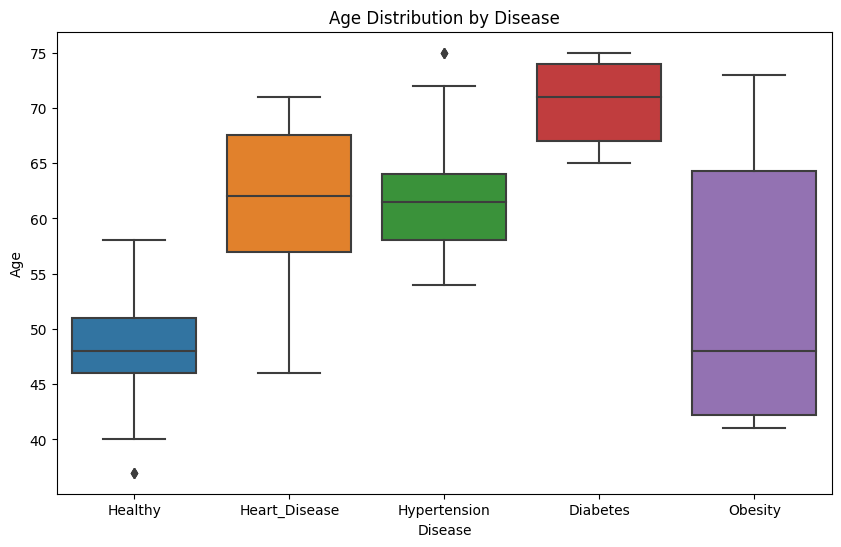

In [9]:
# Boxplot for age distribution by disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disease', y='Age', data=data)
plt.title('Age Distribution by Disease')
plt.show()

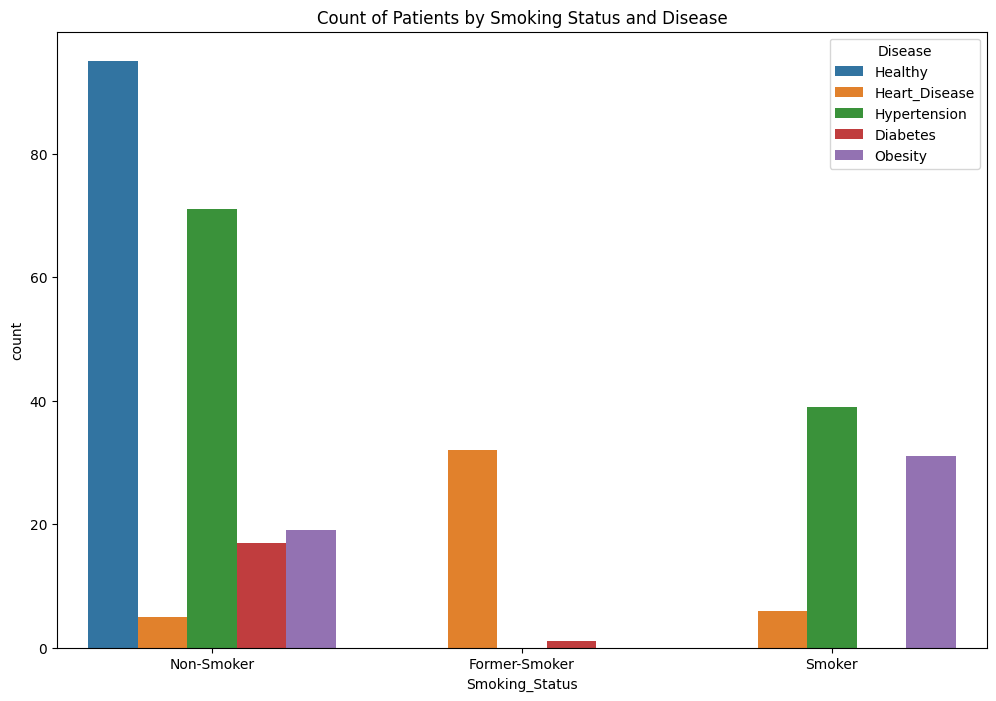

In [10]:
# Countplot for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Smoking_Status', hue='Disease', data=data)
plt.title('Count of Patients by Smoking Status and Disease')
plt.show()

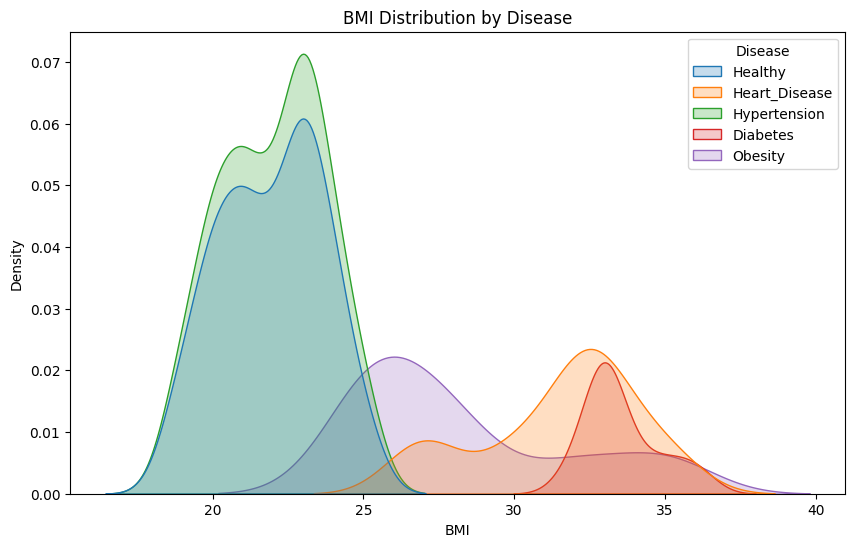

In [11]:
# Distribution of BMI by Disease
plt.figure(figsize=(10, 6))
sns.kdeplot(x='BMI', hue='Disease', data=data, fill=True)
plt.title('BMI Distribution by Disease')
plt.show()

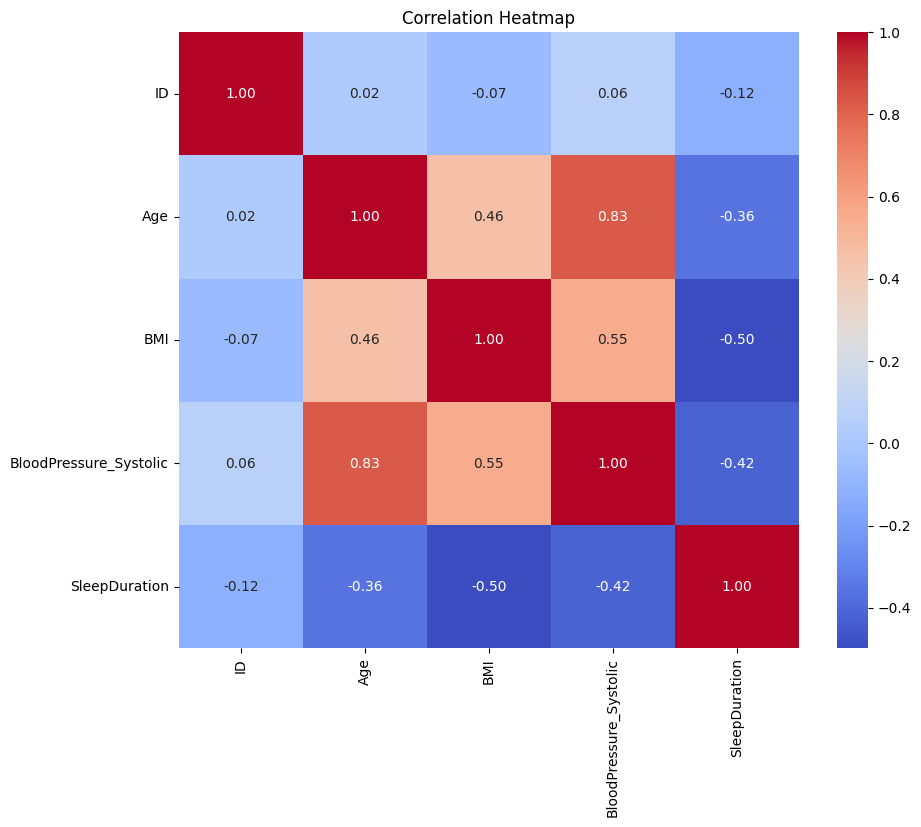

In [12]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Handle missing values (replace with mean for simplicity)
data.fillna(data.mean(), inplace=True)

C:\Users\e3t\AppData\Local\Temp\ipykernel_13424\3797966520.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the original dataset
file_path = "LifeStyle_Data_Exchg - LifeStyle_Data_Demo.csv (1).csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Smoking_Status', 'Diet', 'Alcohol_Consumption','Physical_Activity','Cholesterol']
numerical_cols = ['Age', 'BMI', 'BloodPressure_Systolic','SleepDuration']

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into features (X) and the target variable (y)
X = df.drop('Disease', axis=1)
y = df['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Build a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9688

Confusion Matrix:
[[ 1  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0  8  0  0]
 [ 0  1  0 24  0]
 [ 0  0  1  0 10]]

Classification Report:
               precision    recall  f1-score   support

     Diabetes       1.00      1.00      1.00         1
      Healthy       0.95      1.00      0.97        19
Heart_Disease       0.89      1.00      0.94         8
 Hypertension       1.00      0.96      0.98        25
      Obesity       1.00      0.91      0.95        11

     accuracy                           0.97        64
    macro avg       0.97      0.97      0.97        64
 weighted avg       0.97      0.97      0.97        64



In [27]:
# Now, let's predict diseases for user input
user_input = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [62],
    'BMI': [24],
    'Smoking_Status': ['Non-Smoker'],
    'BloodPressure_Systolic': [119],
    'Diet': ['Balanced'],
    'Alcohol_Consumption': ['Low'],
    'Physical_Activity':['Active'],
    'Cholesterol':['Normal'],
    'SleepDuration':[6]
    
    
})

# Apply the same preprocessing to user input
user_input_encoded = preprocessor.transform(user_input)

# Predict disease
predicted_disease = model.predict(user_input_encoded)

# Display the predicted disease
print("Predicted Disease:", predicted_disease[0])

Predicted Disease: Healthy


In [48]:
65	Female	32	Former-Smoker	140	Inactive	Unhealthy	High	Moderate	6	Heart_Disease

SyntaxError: invalid syntax (3919561137.py, line 1)

In [ ]:
60	Female	31	Non-Smoker	139	Active	Balanced	Normal	Moderate	7	Hypertension

In [24]:
data.tail()

,ID,Age,Gender,BMI,Smoking_Status,BloodPressure_Systolic,Physical_Activity,Diet,Cholesterol,Alcohol_Consumption,SleepDuration,Disease
311,130,54,Female,29,Non-Smoker,132,Active,Balanced,Normal,Low,8,Hypertension
312,131,66,Female,31,Non-Smoker,139,Inactive,Unhealthy,High,Low,6,Hypertension
313,132,71,Male,33,Former-Smoker,147,Inactive,Unhealthy,High,Moderate,6,Heart_Disease
314,133,73,Male,35,Smoker,152,Inactive,Unhealthy,High,High,5,Obesity
315,134,70,Female,34,Non-Smoker,148,Inactive,Unhealthy,High,Low,6,Hypertension


In [25]:
import pickle

file = open("random_forest_model.pkl", 'wb')

pickle.dump(model,file)

In [26]:
import joblib


In [27]:
# Save the trained model
joblib.dump(model, 'your_model.pkl')

# Save the preprocessor
joblib.dump(preprocessor, 'model_preprocessor.pkl')


['model_preprocessor.pkl']